# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing populist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segmentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [2]:
# Q1 (code)
!pip install tomotopy
!pip install little_mallet_wrapper

In [3]:
import tomotopy
import little_mallet_wrapper

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [4]:
# Q2 (code)
!pip install pandas
import pandas as pd

In [5]:
# Load the datasets
sanders_tweets = pd.read_csv('sanders_tweets.csv')
trump_tweets = pd.read_csv('trump_tweets.csv')

In [6]:
# Concatenate the datasets
combined_tweets = pd.concat([sanders_tweets, trump_tweets], ignore_index=True)

In [7]:
combined_tweets.to_csv('combined_tweets.csv', index=False)

### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [8]:
# Q3 (code)
!pip install nltk

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariakutepova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import pandas as pd
import re

from nltk.corpus import stopwords

# Load stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Read the combined_tweets data
combined_tweets = pd.read_csv('combined_tweets.csv')

# Create the lists
training_data = []
original_texts = []
titles = []

for index, row in combined_tweets.iterrows():
    original_text = row['Content']  # The tweet's content
    username = row['Username']  # The username of the tweet's author
    tweet_id = row['TweetId']  # The tweet's ID
    
    # Append the original text to original_texts
    original_texts.append(original_text)
    
    # Combine username and tweet ID to form a title
    titles.append(f"{username}_{tweet_id}")
    
    # Remove URLs and user mentions
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', original_text, flags=re.MULTILINE)
    
    # Convert to lowercase
    processed_text = processed_text.lower()
    
    # Remove punctuation and numbers
    processed_text = re.sub(r'[^a-z\s]', '', processed_text)
    
    # Remove stopwords
    processed_text = ' '.join([word for word in processed_text.split() if word not in stop_words])
    
    # Append the processed text to training_data
    training_data.append(processed_text)

# Verification
print("First 5 processed texts:", training_data[:5])
print("First 5 original texts:", original_texts[:5])
print("First 5 titles:", titles[:5])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariakutepova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First 5 processed texts: ['wealth increase past months billion elon musk billion jeff bezos billion walton family billion bill gates billion mark zuckerberg year increase us minimum wage must tax rich amp raise minimum wage least', 'amidst massive income wealth inequality tens millions americans working starvation wages need raise minimum wage living wage least hour excuses need act', 'resources skills techniques get rid poverty question whether nation dr martin luther king jr', 'surviving attempt life russian activist alexei navalny detained bravely returning russia today call release united states must stand fighting corruption working democracy around world', 'presidentelect bidens covid rescue plan begin provide people muchneeded support direct payments minimum wage look forward working colleagues congress urgently provide bold relief working families']
First 5 original texts: ['Wealth increase in past 10 months:\n⬆️$173 billion: Elon Musk\n⬆️$77 billion: Jeff Bezos\n⬆️$60 billion:

In [10]:
len(training_data), len(original_texts), len(titles)

(30371, 30371, 30371)

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [13]:
# Q4 (code)
import tomotopy as tp

# Number of topics to return
num_topics = 15
# Number of topic words to print out
num_topic_words = 10

# Initialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    # Ensure text is a non-empty string before processing
    if text.strip():
        model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")

# Training the model
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i + iterations}\tLog-likelihood: {model.ll_per_word}')

# After training, print the top words for each topic
for i in range(num_topics):
    print(f"Topic #{i}: {[word for word, _ in model.get_topic_words(i, top_n=num_topic_words)]}")



Topic Model Training...


Iteration: 10	Log-likelihood: -9.293689006240147
Iteration: 20	Log-likelihood: -8.884952342004565
Iteration: 30	Log-likelihood: -8.70713898708682
Iteration: 40	Log-likelihood: -8.611185688910192
Iteration: 50	Log-likelihood: -8.549617419369687
Iteration: 60	Log-likelihood: -8.511385224703828
Iteration: 70	Log-likelihood: -8.478876475269441
Iteration: 80	Log-likelihood: -8.451392944671003
Iteration: 90	Log-likelihood: -8.430945849409321
Iteration: 100	Log-likelihood: -8.416475819354588
Topic #0: ['border', 'democrats', 'amp', 'want', 'would', 'people', 'get', 'country', 'biden', 'joe']
Topic #1: ['people', 'workers', 'wage', 'must', 'pay', 'american', 'americans', 'working', 'america', 'country']
Topic #2: ['witch', 'collusion', 'russia', 'amp', 'hunt', 'mueller', 'fbi', 'trump', 'hillary', 'report']
Topic #3: ['must', 'people', 'rt', 'court', 'law', 'american', 'congress', 'trump', 'country', 'president']
Topic #4: ['great', 'thank', 'new', 'state', 'job', 'am

In [33]:
model.save('trained_model.bin')

In [272]:
#To load the model
#tp.LDAModel.load('trained_model.bin')

### Q5. Print out the top words for each topic and manually evaluate their coherence


In [14]:
# Q5a (code)
print("\nTopic Model Results:\n\n")

topics = []  # To store a string representation of the top words for each topic
topic_individual_words = []  # To store a list of the top words for each topic, in case it's needed for further analysis

# Loop through each topic to get the top words
for topic_number in range(num_topics):
    # Extracting the top words for each topic
    topic_words = ' '.join(word for word, _ in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    # Storing the top words in a string format for easy reading
    topics.append(topic_words)
    # Storing the top words as a list for any potential analysis
    topic_individual_words.append(topic_words.split())
    # Printing the topic number and its top words
    print(f"Topic {topic_number}\n\n{topic_words}\n")

# Optional: Print topics list or topic_individual_words for further analysis or visualization



Topic Model Results:


Topic 0

border democrats amp want would people get country biden joe

Topic 1

people workers wage must pay american americans working america country

Topic 2

witch collusion russia amp hunt mueller fbi trump hillary report

Topic 3

must people rt court law american congress trump country president

Topic 4

great thank new state job america rt amp make people

Topic 5

news fake media amp people even like bad never story

Topic 6

rt change climate energy coronavirus live fossil covid join new

Topic 7

us china united states trade deal amp great many countries

Topic 8

rt trump president biden obama campaign joe via amp election

Topic 9

tax bill security trump republicans cut cuts people americans social

Topic 10

great vote total amp state endorsement strong military complete amendment

Topic 11

rt great president thank today day honor trump american amp

Topic 12

rt great president economy jobs ever trump years record best

Topic 13

rt democrats p

# Q5b (words)
# Describe what each topic is about. What ideas, values, or situations do these keywords refer to?

<div class="alert-info">

#### Topic 0: Immigration and political debate
Keywords like "border," "democrats," "country," "Biden," and "Joe" suggest discussions centered around immigration policies and political debates, possibly reflecting contrasting views on how to manage borders and immigration.
    
#### Topic 1: Labor and economic equity
This topic, with words such as "people," "workers," "wage," "pay," "American," and "working," likely focuses on labor rights, wage standards, and economic equity within the American workforce.
    
#### Topic 2: Political Investigations and controversies
The presence of "witch," "collusion," "Russia," "Mueller," and "FBI" points towards discussions on political investigations, the Russia investigation, and controversies surrounding these high-profile inquiries.
    
#### Topic 3: Legal and constitutional matters
Keywords like "court," "law," "congress," and "president" indicate a focus on legal, constitutional, and potentially impeachment-related discussions, reflecting debates on law and governance.
    
#### Topic 4: National pride and employment

With "great," "thank," "new," "state," "job," and "America," this topic seems to celebrate national achievements, state-specific developments, job creation, and overall American pride.
    
#### Topic 5: Media criticism
The mention of "news," "fake," "media," and "story" suggests criticism of the media, discussions on the reliability of news sources, and the portrayal of events and stories in the press.
    
#### Topic 6: Environmental concerns and health
Keywords such as "change," "climate," "energy," "coronavirus," and "covid" merge environmental issues with the global health crisis, indicating a blend of discussions on climate change and the COVID-19 pandemic.
    
#### Topic 7: International trade relations
This topic, with "us," "china," "united states," "trade," and "deal," focuses on international trade relations, particularly between the US and China, and the impact of trade agreements on national interests.
    
#### Topic 8: Political campaigns and leadership
Featuring "trump," "president," "biden," "obama," "campaign," and "election," this topic revolves around political campaigns, elections, and comparisons between different leadership eras.

#### Topic 9: Fiscal policy and social programs
Keywords like "tax," "bill," "security," "cut," "republicans," and "social" suggest debates on fiscal policy, tax cuts, and the funding of social security and other social programs.

#### Topic 10: Electoral support and defense
With "vote," "endorsement," "state," "military," and "amendment," this topic likely covers electoral strategies, military endorsements, and constitutional rights, emphasizing strong national defense and constitutional amendments.

#### Topic 11: Recognition and commemoration
The mention of "great," "president," "thank," "honor," and "American" reflects themes of recognition, gratitude, and commemoration of significant individuals or events.

#### Topic 12: Economic achievements and leadership
With "economy," "jobs," "record," and "best," this topic celebrates economic achievements, job creation, and possibly attributes these successes to specific leadership or policies.

#### Topic 13: Impeachment and political strategy
Keywords like "democrats," "impeachment," "house," "senate," and names of politicians suggest discussions on impeachment processes, political strategies, and critiques of political figures.

#### Topic 14: Healthcare and rights
Focusing on "health," "care," "need," "americans," and "drug," this topic addresses healthcare policies, the need for affordable care, and the right to health, emphasizing accessibility and drug pricing.

</div>

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [15]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5633708754181863 
Per Topic: [0.46931503117084505, 0.5708958148956299, 0.7411670714616776, 0.360918191075325, 0.4054031789302826, 0.6271125972270966, 0.5789780162274838, 0.5854015246033668, 0.6040439248085022, 0.591262974590063, 0.7466716349124909, 0.43071074038743973, 0.4764957755804062, 0.6406039088964463, 0.6215827465057373]



<div class="alert-info">

The coherence scores are generally decent, but there is a significant gap between the most and least coherent topics (topic 3 - 0.3609 and topic 10 - 0.7467). Thefore, we can try and retrain the model with a smaller number of topics to see whether the coherence scores will increase.

</div>

In [30]:
# Adjusting the number of topics for the second model
num_topics2 = 12  # New number of topics
num_topic_words2 = 10 

# Initialize the second model
model2 = tp.LDAModel(k=num_topics2)

# Add each document to the second model, after splitting it up into words
for text in training_data:
    if text.strip():  # Ensure text is a non-empty string before processing
        model2.add_doc(text.strip().split())

print("Topic Model 2 Training...\n\n")

# Training the second model
iterations2 = 10  
for i in range(0, 100, iterations2):
    model2.train(iterations2)
    print(f'Iteration: {i + iterations2}\tLog-likelihood: {model2.ll_per_word}')

# Print the top words for each topic in the second model
for i in range(num_topics2):
    print(f"Topic #{i}: {[word for word, _ in model2.get_topic_words(i, top_n=num_topic_words2)]}")


Topic Model 2 Training...


Iteration: 10	Log-likelihood: -9.211108498513896
Iteration: 20	Log-likelihood: -8.830494327916382
Iteration: 30	Log-likelihood: -8.64532478252128
Iteration: 40	Log-likelihood: -8.56254882859591
Iteration: 50	Log-likelihood: -8.510847338407865
Iteration: 60	Log-likelihood: -8.474122492820221
Iteration: 70	Log-likelihood: -8.448367973272406
Iteration: 80	Log-likelihood: -8.429201359241212
Iteration: 90	Log-likelihood: -8.411581479206315
Iteration: 100	Log-likelihood: -8.400940598122714
Topic #0: ['rt', 'amp', 'fbi', 'trump', 'collusion', 'witch', 'hunt', 'russia', 'president', 'campaign']
Topic #1: ['great', 'thank', 'rt', 'today', 'president', 'america', 'pm', 'tonight', 'north', 'house']
Topic #2: ['people', 'democrats', 'would', 'country', 'years', 'want', 'never', 'dont', 'done', 'nothing']
Topic #3: ['care', 'health', 'people', 'tax', 'workers', 'americans', 'million', 'pay', 'must', 'need']
Topic #4: ['us', 'china', 'jobs', 'trade', 'states', 'amp', 'uni

In [34]:
model2.save('trained_model2.bin')

In [269]:
#To load the model
#tp.LDAModel.load('trained_model2.bin')

In [31]:
# Calculate coherence for the second model using 'c_v' metric
coh2 = tp.coherence.Coherence(model2, coherence='c_v')
average_coherence2 = coh2.get_score()
coherence_per_topic2 = [coh2.get_score(topic_id=k) for k in range(model2.k)]

print('==== Coherence for Model 2: {} ===='.format('c_v'))
print('Average:', average_coherence2, '\nPer Topic:', coherence_per_topic2)
print()


==== Coherence for Model 2: c_v ====
Average: 0.5545803057029843 
Per Topic: [0.6239260226488114, 0.47949123084545137, 0.541868194937706, 0.659865203499794, 0.5343278899788857, 0.509433901309967, 0.5251054108142853, 0.6919639199972153, 0.5487357556819916, 0.5719544097781182, 0.411851055175066, 0.5564406737685204]



<div class="alert-info">

The second model was trained using 12 topics, and while the average coherence score slightly decreased (0.5546 VS 0.5634), the gaps between the most and least coherent topics also decreased (topic 7 - 0.692 and topic 10 - 0.412 in the second model VS topic 3 - 0.3609 and topic 10 - 0.7467 in the first model). We can try and adjust the number of topic once again and see where it takes us.
    
</div>

In [49]:
# Adjusting the number of topics for the third model
num_topics3 = 10  # New number of topics
num_topic_words3 = 10 

# Initialize the third model
model3 = tp.LDAModel(k=num_topics3)

# Add each document to the model, after splitting it up into words
for text in training_data:
    if text.strip():  # Ensure text is a non-empty string before processing
        model3.add_doc(text.strip().split())

print("Topic Model 3 Training...\n\n")

# Training the third model
iterations3 = 10 
for i in range(0, 100, iterations3):
    model3.train(iterations3)
    print(f'Iteration: {i + iterations3}\tLog-likelihood: {model3.ll_per_word}')

# Print the top words for each topic in the third model, iterating through num_topics3
for i in range(num_topics3):
    print(f"Topic #{i}: {[word for word, _ in model3.get_topic_words(i, top_n=num_topic_words3)]}")


Topic Model 3 Training...


Iteration: 10	Log-likelihood: -9.149570467642546
Iteration: 20	Log-likelihood: -8.81286231528142
Iteration: 30	Log-likelihood: -8.646328472011774
Iteration: 40	Log-likelihood: -8.558677866791125
Iteration: 50	Log-likelihood: -8.504230013177182
Iteration: 60	Log-likelihood: -8.471023397136372
Iteration: 70	Log-likelihood: -8.443389866249378
Iteration: 80	Log-likelihood: -8.425368283790773
Iteration: 90	Log-likelihood: -8.41169931249264
Iteration: 100	Log-likelihood: -8.398691253439475
Topic #0: ['health', 'care', 'people', 'must', 'right', 'country', 'americans', 'every', 'need', 'workers']
Topic #1: ['rt', 'president', 'democrats', 'trump', 'impeachment', 'house', 'biden', 'nothing', 'court', 'senate']
Topic #2: ['rt', 'great', 'thank', 'today', 'president', 'amp', 'america', 'honor', 'day', 'national']
Topic #3: ['news', 'fake', 'amp', 'media', 'trump', 'never', 'fbi', 'russia', 'rt', 'people']
Topic #4: ['us', 'states', 'amp', 'united', 'china', 'border', 

In [50]:
model3.save('trained_model3.bin')

In [270]:
#To load the model
#tp.LDAModel.load('trained_model3.bin')

In [51]:
# Calculate coherence for the third model using 'c_v' metric
coh3 = tp.coherence.Coherence(model3, coherence='c_v')
average_coherence3 = coh3.get_score()
coherence_per_topic3 = [coh3.get_score(topic_id=k) for k in range(model3.k)]

print('==== Coherence for Model 3: {} ===='.format('c_v'))
print('Average:', average_coherence3, '\nPer Topic:', coherence_per_topic3)
print()


==== Coherence for Model 3: c_v ====
Average: 0.5543403760716319 
Per Topic: [0.6275162696838379, 0.5839697986841201, 0.45155503451824186, 0.5628888655453921, 0.5155417889356613, 0.4824588418006897, 0.48425485417246816, 0.5892279893159866, 0.716788437962532, 0.5292018800973892]



<div class="alert-info">

The third model was trained using 10 topics, which resulted in the average coherence (0.5543). The gap between the most and least cohesive topics slightly decreased compared to the second model (topic 8 -  0.7168 and topic 2 - 0.4516). One last experiment: what if we increase the number of topics from the initial 15 to, for instance, 17?
    
</div>

In [52]:
# Adjusting the number of topics for the fourth model
num_topics4 = 17  # Setting up for 17 topics
num_topic_words4 = 10 

# Initialize the fourth model 
model4 = tp.LDAModel(k=num_topics4)

# Add each document to the model, after splitting it up into words
for text in training_data:
    if text.strip():  # Ensure text is a non-empty string before processing
        model4.add_doc(text.strip().split())

print("Topic Model 4 Training...\n\n")

# Training the fourth model
iterations4 = 10 
for i in range(0, 100, iterations4):
    model4.train(iterations4)
    print(f'Iteration: {i + iterations4}\tLog-likelihood: {model4.ll_per_word}')

# Print the top words for each topic in the fourth model, iterating through num_topics4
for i in range(num_topics4):
    print(f"Topic #{i}: {[word for word, _ in model4.get_topic_words(i, top_n=num_topic_words4)]}")


Topic Model 4 Training...


Iteration: 10	Log-likelihood: -9.33568511376305
Iteration: 20	Log-likelihood: -8.914757118003902
Iteration: 30	Log-likelihood: -8.72360452087224
Iteration: 40	Log-likelihood: -8.621850846499626
Iteration: 50	Log-likelihood: -8.56241303225144
Iteration: 60	Log-likelihood: -8.516400469127516
Iteration: 70	Log-likelihood: -8.483389963433135
Iteration: 80	Log-likelihood: -8.459752605117114
Iteration: 90	Log-likelihood: -8.438684718402998
Iteration: 100	Log-likelihood: -8.425830759297755
Topic #0: ['must', 'border', 'wall', 'country', 'security', 'government', 'us', 'people', 'congress', 'federal']
Topic #1: ['rt', 'people', 'trump', 'president', 'going', 'dont', 'democrats', 'never', 'get', 'know']
Topic #2: ['collusion', 'witch', 'hunt', 'russia', 'mueller', 'trump', 'fbi', 'hillary', 'amp', 'campaign']
Topic #3: ['china', 'united', 'states', 'us', 'climate', 'energy', 'change', 'deal', 'north', 'korea']
Topic #4: ['great', 'total', 'endorsement', 'vote', 'stro

In [53]:
model4.save('trained_model4.bin')

In [271]:
#To load the model
#tp.LDAModel.load('trained_model4.bin')

In [54]:
# Calculate coherence for the fourth model using 'c_v' metric
coh4 = tp.coherence.Coherence(model4, coherence='c_v')
average_coherence4 = coh4.get_score()
coherence_per_topic4 = [coh4.get_score(topic_id=k) for k in range(model4.k)]

print('==== Coherence for Model 4: {} ===='.format('c_v'))
print('Average:', average_coherence4, '\nPer Topic:', coherence_per_topic4)
print()


==== Coherence for Model 4: c_v ====
Average: 0.5620711724219076 
Per Topic: [0.5342325210571289, 0.4824664145708084, 0.7139764457941056, 0.5847205579280853, 0.7502863734960556, 0.5328195869922638, 0.5974115312099457, 0.7130924761295319, 0.472213208861649, 0.6415851354598999, 0.5886881217360497, 0.4221777394413948, 0.460733900219202, 0.48809732049703597, 0.620722159743309, 0.46545699089765546, 0.4865294471383095]



<div class="alert-info">

In general, the changes in coherence scores were insignifacnt, and the average coherence score in this model (0.5621) is almost equal to the average coherence score in our first model with 15 topics (0.5634). 
    
</div>

### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

<div class="alert-info">

The first model was trained on 15 topics, and it resulted in the average coherence score of 0.5634, with a significant gap between topic 3 (0.3609) and topic 10 (0.7467). The second model was trained using 12 topics, and while the average coherence score slightly decreased (0.5546 VS 0.5634), the gaps between the most and least coherent topics also decreased (topic 7 - 0.692 and topic 10 - 0.412 in the second model VS topic 3 - 0.3609 and topic 10 - 0.7467 in the first model). Next, the third model was trained using 10 topics, which resulted in the average coherence  score of (0.5543). The gap between the most and least cohesive topics slightly (I would say, insignificantly) decreased compared to the second model (topic 0 - 0.3867 and topic 9 - 0.6346). Finally, the fourth model with 17  resulted in the general coherence score of 0.5621, which is almost the same as the average coherence score in the first model with 15 topics.
    
In conclusion, I would not say that in this case much changed with the adjustments of topic numbers. I suppose, it is important to print out the topics for each model and check what fits your research more.

</div>


### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

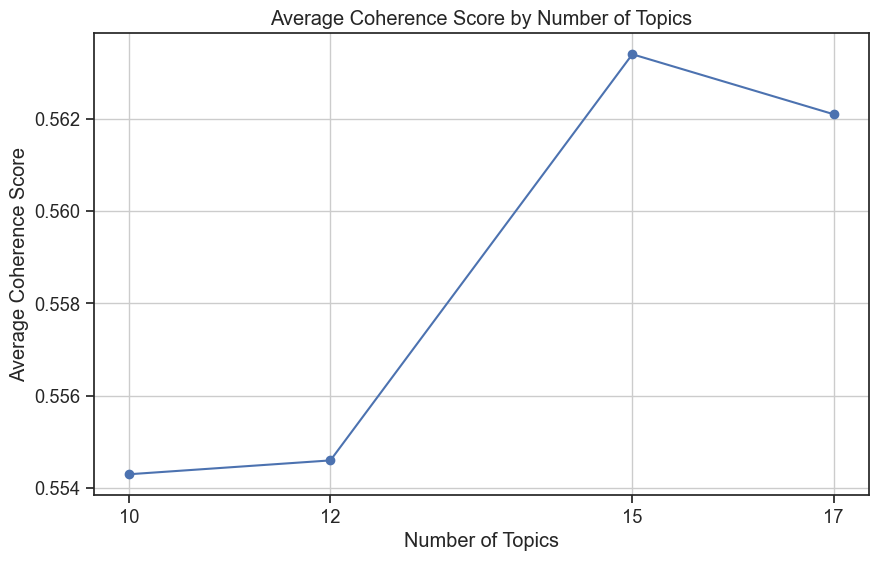

In [55]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model
import matplotlib.pyplot as plt

def plot_average_coherence(num_topics_list, avg_coherence_list):
    """
    Plots the average topic coherence against the number of topics in the model.
    
    :param num_topics_list: A list of integers representing the number of topics in each model.
    :param avg_coherence_list: A list of floats representing the average coherence score for each model.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(num_topics_list, avg_coherence_list, marker='o', linestyle='-', color='b')
    plt.title('Average Coherence Score by Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence Score')
    plt.xticks(num_topics_list)  # Ensure there's a tick for each number of topics
    plt.grid(True)
    plt.show()
    
num_topics_list = [10, 12, 15, 17]  # List of different numbers of topics per models 1-4
avg_coherence_list = [0.5543, 0.5546, 0.5634,  0.5621]  # Corresponding coherence scores per models 1-4

# Plot the average coherence for each model
plot_average_coherence(num_topics_list, avg_coherence_list)


<div class="alert-info">

The plot above allowed us to look closer at the average coherence scores in models with different topic numbers. Here, we can see that the highest average coherence score was obtained in the model with 15 topics.
</div>


### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [175]:
# Q7a (code)
# Since our initial model with 15 topics has the highest average coherence score, let's focus on it
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

In [176]:
print(len(topics)) #Ensuring this matches the number of topics in the model

15


In [177]:
# Create a list
combined_tweets['title'] = combined_tweets['Username'] + '_' + combined_tweets['TweetId'].astype(str)
titles = combined_tweets['title'].tolist()

In [178]:
# Print the first few titles to verify they're correctly formatted
print(titles[7294:7304])


['SenSanders_682758913071181824', 'SenSanders_682734558031253504', '@realDonaldTrump_822421390125043713', '@realDonaldTrump_822501803615014918', '@realDonaldTrump_822501939267141634', '@realDonaldTrump_822502135233384448', '@realDonaldTrump_822502270503972872', '@realDonaldTrump_822502450007515137', '@realDonaldTrump_822502601304526848', '@realDonaldTrump_822502887477673984']


In [179]:
def get_top_docs(docs, topic_distributions, topic_index, n=5):
    
    topic_words = topics[topic_index]
    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)
    
    make_md(f"### Topic {topic_index}\n\n{topic_words}\n\n")
    print("---")

    for probability, doc_identifier in sorted_data[:n]:
        # Fetching the full text of the document using its identifier
        doc_content = original_texts[docs.index(doc_identifier)]
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc_content.lower():
                doc_content = re.sub(f"\\b{word}\\b", f"**{word}**", doc_content, flags=re.IGNORECASE)
                
        make_md(f' \n**Title**: {doc_identifier}  \n**Topic Probability**: {probability:.4f}  \n**Tweet**: {doc_content}\n\n')

# Call the function for topics 5, 8, and 13, as examples
get_top_docs(titles, topic_distributions, topic_index=2, n=10)
get_top_docs(titles, topic_distributions, topic_index=10, n=10)
get_top_docs(titles, topic_distributions, topic_index=13, n=10)


### Topic 2

witch collusion russia amp hunt mueller fbi trump hillary report



---


 
**Title**: @realDonaldTrump_1071389414239162369  
**Topic Probability**: 0.9343  
**Tweet**:  AFTER TWO YEARS AND MILLIONS OF PAGES OF DOCUMENTS (and a cost of over $30,000,000), NO **collusion**!



 
**Title**: @realDonaldTrump_1008328413210398720  
**Topic Probability**: 0.9343  
**Tweet**:  Funny how the Fake News, in a coordinated effort with each other, likes to say I gave sooo much to North Korea because I “met.” That’s because that’s all they have to disparage! We got so much for peace in the world, &**amp**; more is being added in finals. Even got our hostages/remains!



 
**Title**: @realDonaldTrump_1041094855592689664  
**Topic Probability**: 0.9112  
**Tweet**:  Five deaths have been recorded thus far with regard to hurricane Florence! Deepest sympathies and warmth go out to the families and friends of the victims. May God be with them!



 
**Title**: @realDonaldTrump_890168183079960576  
**Topic Probability**: 0.8954  
**Tweet**:  Senator @lisamurkowski of the Great State of Alaska really let the Republicans, and our country, down yesterday. Too bad!



 
**Title**: @realDonaldTrump_976405122757558272  
**Topic Probability**: 0.8931  
**Tweet**:  AUSTIN BOMBING SUSPECT IS DEAD. Great job by law enforcement and all concerned!



 
**Title**: @realDonaldTrump_1007002252467458048  
**Topic Probability**: 0.8931  
**Tweet**:  Congratulations to @KevinCramer on his huge win in North Dakota. We need Kevin in the Senate, and I strongly endorse him. Heidi voted NO on our Tax Cuts, and always will vote no when we need her. Kevin is strong on Crime &**amp**; Borders, big on Cutting Taxes!



 
**Title**: @realDonaldTrump_974859881827258369  
**Topic Probability**: 0.8888  
**Tweet**:  Andrew McCabe FIRED, a great day for the hard working men and women of the **fbi** - A great day for Democracy. Sanctimonious James Comey was his boss and made McCabe look like a choirboy. He knew all about the lies and corruption going on at the highest levels of the **fbi**!



 
**Title**: @realDonaldTrump_924641278947622913  
**Topic Probability**: 0.8888  
**Tweet**:  ...are now fighting back like never before. There is so much GUILT by Democrats/Clinton, and now the facts are pouring out. DO SOMETHING!



 
**Title**: @realDonaldTrump_1029089559710236672  
**Topic Probability**: 0.8842  
**Tweet**:  Great to be in Fort Drum, New York with our HEROES! https://t.co/Ke54QGZbU7



 
**Title**: @realDonaldTrump_1015037322226642944  
**Topic Probability**: 0.8842  
**Tweet**:  Every day, the brave men and women of ICE are liberating communities from savage gangs like MS-13. We will NOT stand for these vile Democrat smears in law enforcement. We will always stand proudly with the BRAVE HEROES of ICE and BORDER PATROL!



### Topic 10

great vote total amp state endorsement strong military complete amendment



---


 
**Title**: @realDonaldTrump_1164746544677101568  
**Topic Probability**: 0.9491  
**Tweet**:  RT @Jim_Jordan: Business owners and hard-working Americans tell us every day how **great** the economy is under President Trump.  But now the Left is openly wishing for a “recession!”  It’s the clearest example yet: Democrats are desperate to stop the President, even if it hurts America.



 
**Title**: @realDonaldTrump_1228438298584141826  
**Topic Probability**: 0.9443  
**Tweet**:  ‚ÄúThe Greatest name in politics,‚Äù Patrick @ McHenryCampaign from the **great** **state** of North Carolina, is a Conservative Fighter and a true Leader who ALWAYS supports our # MAGA Agenda. Patrick has my **complete** and **total** **endorsement**!https://secure.winred.com/mchenry-for-congress/donate ‚Ä¶



 
**Title**: @realDonaldTrump_1034778515789545473  
**Topic Probability**: 0.9406  
**Tweet**:  Big Election Wins last night! The Republican Party will MAKE AMERICA **great** AGAIN! Actually, it is happening faster than anybody thought possible! It is morphing into KEEP AMERICA **great**!



 
**Title**: @realDonaldTrump_1231366964611866625  
**Topic Probability**: 0.9385  
**Tweet**:  Looks like Crazy Bernie is doing well in the **great** **state** of Nevada. Biden &**amp**; the rest look weak, &**amp**; no way Mini Mike can restart his campaign after the worst debate performance in the history of Presidential Debates. Congratulations Bernie, &**amp**; don’t let them take it away from you!



 
**Title**: @realDonaldTrump_1300017727638298624  
**Topic Probability**: 0.9363  
**Tweet**:  RT @RichardGrenell: Hours after @tedwheeler sent a “I Don’t Want Trump’s Help” letter, his city is in chaos. https://t.co/R8RkOpalkd



 
**Title**: @realDonaldTrump_1246428432180928514  
**Topic Probability**: 0.9363  
**Tweet**:  RT @GOP: 'The states should know how many ventilators they have in their **state**…This is a time of crisis, and you're seeing certain people are better managers than others.” -Jared Kushner https://t.co/ojVEbpqplB



 
**Title**: @realDonaldTrump_1019230023897833479  
**Topic Probability**: 0.9363  
**Tweet**:  The economy of the United States is stronger than ever before!



 
**Title**: @realDonaldTrump_1245867461179670528  
**Topic Probability**: 0.9340  
**Tweet**:  https://t.co/C4YLj4hKZn



 
**Title**: @realDonaldTrump_1230884976977043456  
**Topic Probability**: 0.9340  
**Tweet**:  Mitch and I have made **great** progress. Coming back fast! https://t.co/ksJRH2UzlE



 
**Title**: @realDonaldTrump_1228158207006330880  
**Topic Probability**: 0.9340  
**Tweet**:  RT @DailyCaller: ‘Why Would I Not:’ Chiefs’ Bashaud Breeland Looking Forward To WH Visit After Super Bowl Win https://t.co/0t9bdLQKDn



### Topic 13

rt democrats president impeachment house senate nothing call schiff pelosi



---


 
**Title**: @realDonaldTrump_1205457765961011201  
**Topic Probability**: 0.9405  
**Tweet**:  Poll numbers have gone through the roof in favor of No **impeachment**, especially with Swing States and Independents in Swing States. People have figured out that the **democrats** have no case, it is a total Hoax. Even **pelosi** admitted yesterday that she began this scam 2 1/2 years ago!



 
**Title**: @realDonaldTrump_1205132856135168006  
**Topic Probability**: 0.9383  
**Tweet**:  Big!!! https://t.co/powyhHM50y



 
**Title**: @realDonaldTrump_1198746376420679680  
**Topic Probability**: 0.9280  
**Tweet**:  ....contracting procedures were not addressed to my satisfaction. Therefore, Secretary of the Navy Richard Spencer’s services have been terminated by Secretary of Defense Mark Esper. I thank Richard for his service &amp; commitment. Eddie will retire peacefully with all of the.....



 
**Title**: @realDonaldTrump_1293619264973414401  
**Topic Probability**: 0.9135  
**Tweet**:  Good news for Florida! I’m awarding $27.8M from @USDOT in federal infrastructure funds to five areas including Orlando, Jacksonville, Ft. Myers/Naples, St. Petersburg, and Tampa. Happy to support bus service for the people in beautiful Florida!



 
**Title**: @realDonaldTrump_1185533188761882625  
**Topic Probability**: 0.9038  
**Tweet**:  **rt** @ZTPetrizzo: Feeling bad for this intern... https://t.co/7WoYCRJbvv



 
**Title**: @realDonaldTrump_1203897969478635520  
**Topic Probability**: 0.8988  
**Tweet**:  “The **democrats** have thrown a wrecking ball at our Democracy.” @MariaBartiromo



 
**Title**: @realDonaldTrump_1198692848763383809  
**Topic Probability**: 0.8981  
**Tweet**:  **rt** @MZHemingway: The first phase of **impeachment** did not go well for **democrats**. It needed to be a time when support for the inquiry and **impeachment** grew. Instead, it shrank. Here’s why. https://t.co/iynnqKRnV5



 
**Title**: @realDonaldTrump_1190375834529468423  
**Topic Probability**: 0.8949  
**Tweet**:  .....with a **president** and Federal Government that wants our wonerful City and State to flourish and thrive. I Love New York!



 
**Title**: @realDonaldTrump_1219984524488204288  
**Topic Probability**: 0.8916  
**Tweet**:  **rt** @GOP: While **president** @realDonaldTrump is delivering on his Promises MADE, **house** **democrats** are continuing to push their politically motivated **impeachment** agenda. https://t.co/X91sVDhsVC



 
**Title**: @realDonaldTrump_1185379196203421696  
**Topic Probability**: 0.8916  
**Tweet**:  **pelosi** and **impeachment** - There have already been 3 Votes, and they’ve all failed miserably. Here’s why there may not be a fourth - 137 **democrats** voted against on the last vote.” @JasonChaffetz  @seanhannity  Many of those voting in favor will be beaten in 2020!



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

In [117]:
# Q7b (words)

<div class="alert-info">
After carefully looking at the topic analysis and description from Q5b, as well as the coherence scores across topics, I decided to focus on 3 topics with the highest coherence scores, which are topics 2 - Political Investigations and Controversies (0.7412), 10 - Electoral Support and Defense (0.7467), and 13 - Impeachment and Political Strategy (0.6406). 

#### Topic 2
    
**Predominant Author**: Trump. The tweets under this topic cover the themes of collusion (or its abscence), fake news, talks about  North Korea, and, of course, mentions of Democrats and Clinton. These themes directly reflect on the overarching topic of controversies around Trump's governance, so it makes sense that this topic is representative of Trump's views and position.

#### Topic 10
    
**Predominant Author**: Trump. The tweets listed under this topic focus significantly on endorsements, voting encouragement, and defense, which, probably, were key themes in Trump's communications, especially around the time of elections and in promoting his administration's achievements. The focus on the words "great" (we all remember MAGA) "vote," "endorsement," and "military" aligns closely with Trump's rhetoric and policy emphasis, making it more representative of his viewpoints. The emphasis on strong leadership and national defense is consistent with his public persona.
    

#### Topic 13
    
**Predominant Author**: Trump. This topic is centered around impeachment, a critical event in Trump's presidency, and his criticisms of Democrats, which were frequent subjects of his tweets. The repeated mentions of "Schiff" and "Pelosi" underline the adversarial nature of these discussions. Given the personal and political stakes of the impeachment process for Trump, along with his active engagement in political discourse criticizing the Democrats, it's clear why this topic is more representative of his views. The direct references/retweets further emphasize his active involvement and stance on these issues.
    
In all three topics, the top tweets were created by Trump.
    
</div>

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [216]:
# Crete a sample of tweets

# disabling the piece of code to avoid re-running it: from random import sample

target_labels = sample(titles,100)

In [254]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style='ticks', font_scale=1.2)

def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      target_labels=None,
                                      output_path=None,
                                      color_map='rocket_r',  
                                      dim=(None)):  
    
    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                # Append a short summary for each topic to the 'Topic' key
                topic_summary = ' '.join(topic_keys[_topic_index][:5]) if len(topic_keys) > _topic_index else "Topic " + str(_topic_index)
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + topic_summary})
                
    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category', 
                                     columns='Topic', 
                                     values='Probability')
    df_norm_col = (df_wide - df_wide.mean()) / df_wide.std()

    #Show the plot
    
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

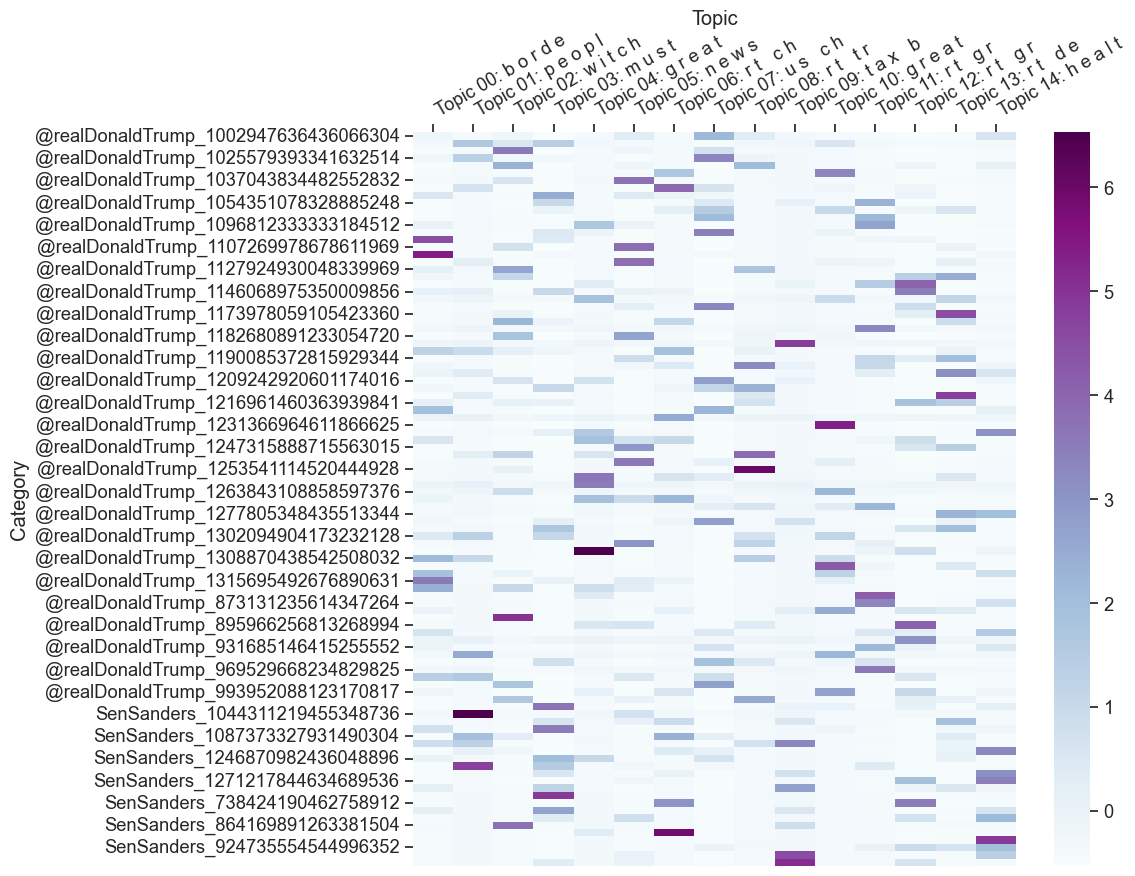

In [257]:
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topics,  # Assuming 'topics' contains your topic summaries or top words
                                  target_labels=target_labels,
                                  color_map='BuPu',
                                  dim=(12, 9))  # Adjust 'dim' as needed for visibility

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

In [206]:
# Q9 (words)

<div class="alert-info">

The topics that appear to be more likely for Trump are topic 0 (Immigration and political debate), topic 2(Political Investigations and controversies), topic 7 (International trade relations), and topic 11 (Recognition and commemoration).

The topics that appear to be more likely for Sanders are topic 3 (Legal and constitutional matters), topic 9 (Fiscal policy and social programs), and topic 14 (Healthcare and Rights).
    
</div>

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [222]:
# X2 (code)

from random import sample

# Separate titles into two groups
trump_titles = [title for title in titles if "realDonaldTrump" in title]
sanders_titles = [title for title in titles if "SenSanders" in title]

# Sample 50 from each
trump_sample = sample(trump_titles, 50)
sanders_sample = sample(sanders_titles, 50)

# Combine the two samples to create a balanced sample
balanced_sample = trump_sample + sanders_sample



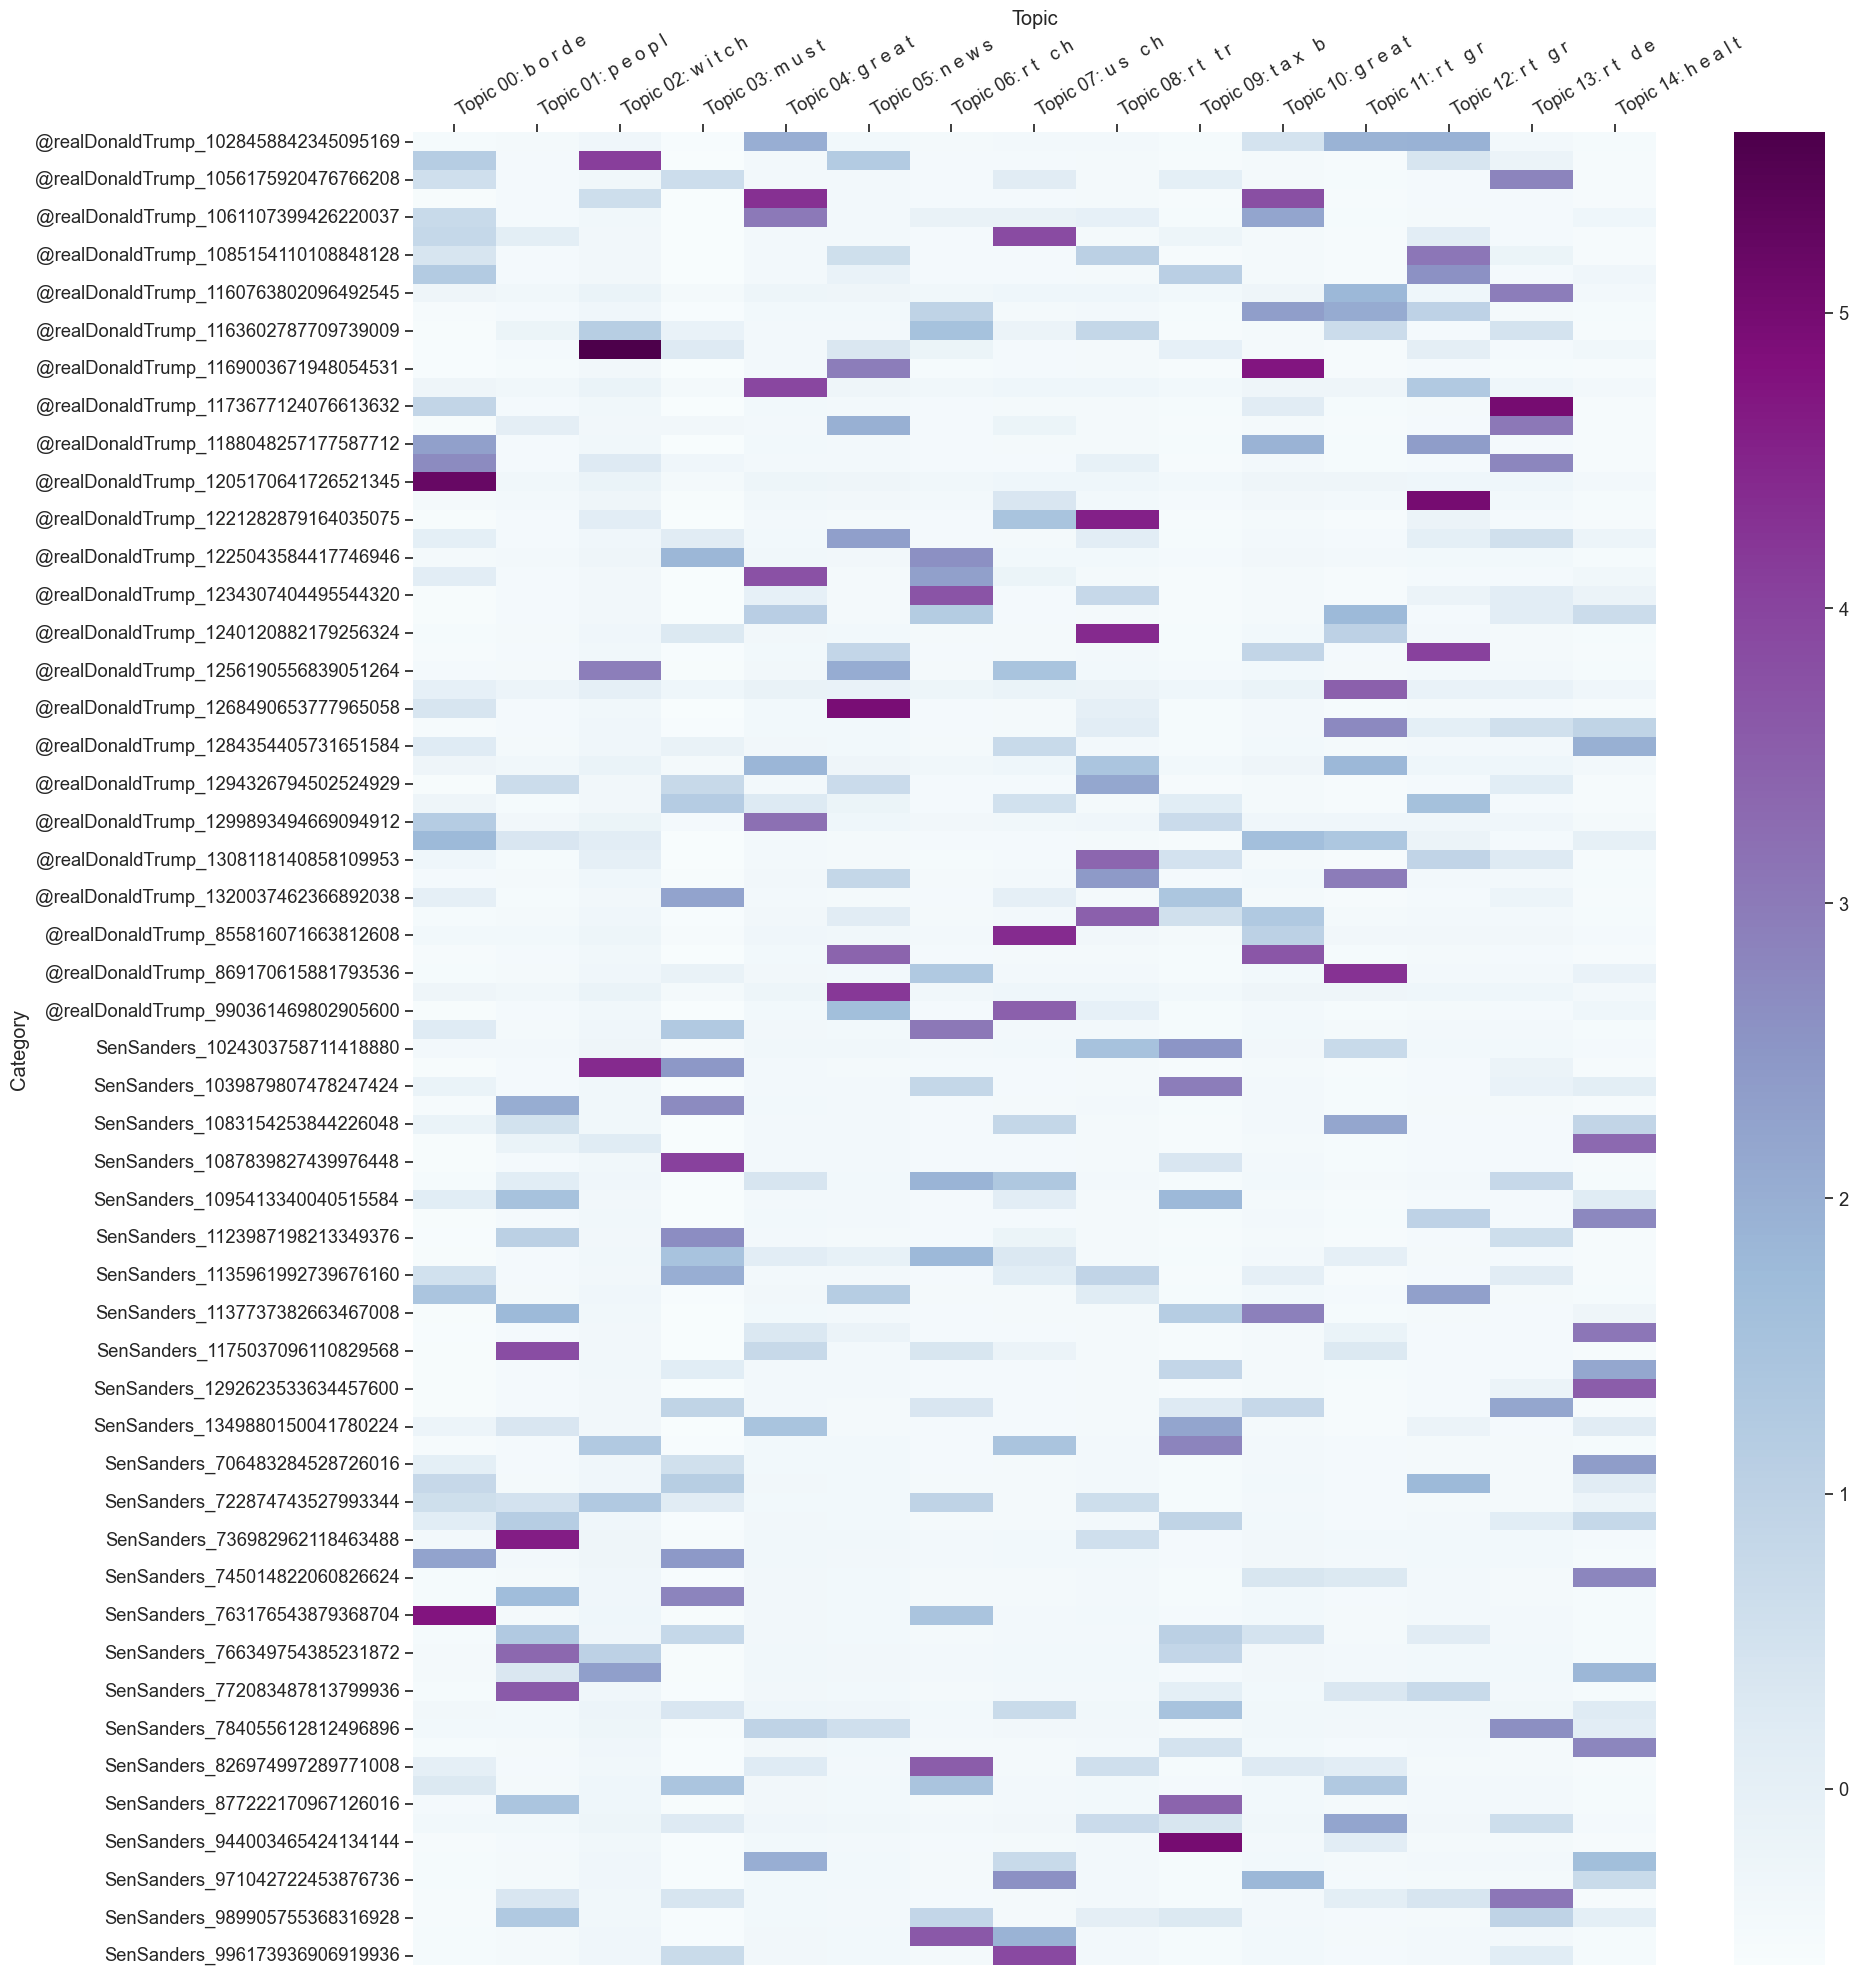

In [267]:
dim = (20, 20)

# Call the plotting function with the updated parameters
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topics,
                                  target_labels=balanced_sample,
                                  color_map='BuPu',
                                  dim=dim)  

<div class="alert-info">

This heatmap looks more balanced, and there are some changes 
    
Looks like, again, the topics that are more likely for Trump are topic 0 (Immigration and political debate), topic 2(Political Investigations and controversies), topic 5 (Media criticism - was not obvious in the first heatmap), topic 11 (Recognition and commemoration), and topic 12 (Economic achievements and leadership - also appeared darker in this heatmap).

The topics that appear to be more likely for Sanders are topic 1 (Labor and economic equity), topic 3 (Legal and constitutional matters), (topic 9 (Fiscal policy and social programs), and topic 14 (Healthcare and rights).
    
</div>

### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [247]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)

sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()


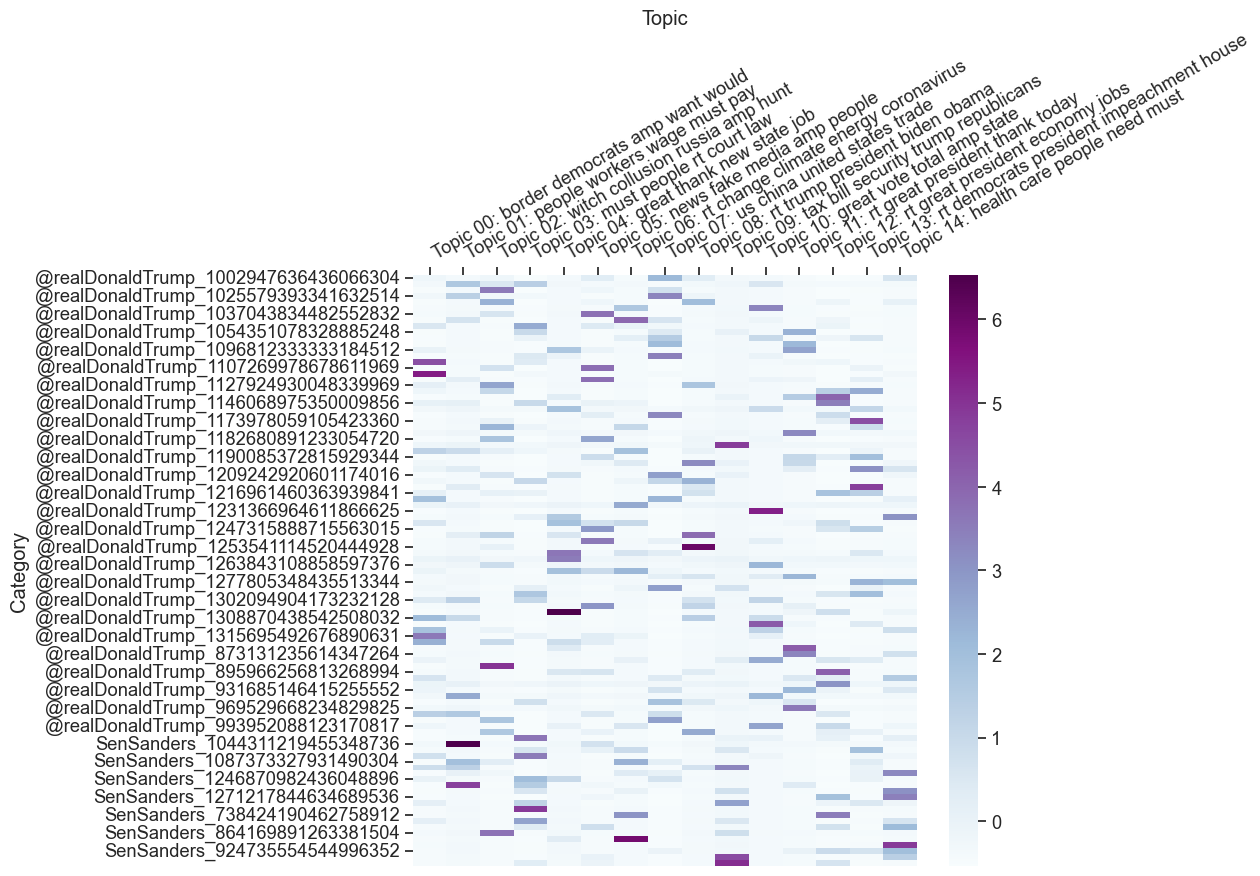

In [252]:
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'BuPu',
                                 dim=(12,9))

<div class="alert-info">

This heatmap indicates the following topics as being likely for Trump/Sanders:
    
**Trump**: Topic 0, topic 4, topic 5, topic 7, topic 8, topic 11 and 13.
    
**Sanders**: Topic 1, Topic 3, topic 9, topic 14.
    
</div>